#### Reading Stocks

In [12]:
# loading packages (pip/pip3 list for new packages) - https://github.com/akfamily/akshare
# pip install akshare --upgrade
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import akshare as ak 

# plt.rcParams['font.sans-serif'] = 'Arial Unicode MS' #显示中文
plt.rcParams['font.sans-serif'] = ['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False 

In [3]:
df_raw = ak.stock_zh_a_spot()

In [4]:
df_raw.columns

Index(['代码', '名称', '最新价', '涨跌额', '涨跌幅', '买入', '卖出', '昨收', '今开', '最高', '最低',
       '成交量', '成交额', '时间戳'],
      dtype='object')

In [5]:
df_raw.head

<bound method NDFrame.head of             代码    名称     最新价   涨跌额    涨跌幅      买入      卖出      昨收      今开  \
0     bj430017  星昊医药   13.00  0.10  0.775   12.99   13.00   12.90   12.85   
1     bj430047  诺思兰德   17.18 -0.17 -0.980   17.18   17.19   17.35   17.19   
2     bj430090  同辉信息    3.88 -0.06 -1.523    3.88    3.89    3.94    3.86   
3     bj430139  华岭股份   11.93 -0.05 -0.417   11.93   11.97   11.98   12.00   
4     bj430198  微创光电    8.47 -0.12 -1.397    8.47    8.48    8.59    8.63   
...        ...   ...     ...   ...    ...     ...     ...     ...     ...   
5350  sz301577  美信科技   61.75 -0.71 -1.137   61.75   61.77   62.46   61.60   
5351  sz301578  辰奕智能   58.16 -0.39 -0.666   58.16   58.18   58.55   58.05   
5352  sz301588  美新科技   31.10 -1.40 -4.308   31.10   31.11   32.50   31.90   
5353  sz301589  诺瓦星云  476.66 -8.42 -1.736  476.63  476.66  485.08  482.82   
5354  sz301591  肯特股份   50.75 -0.35 -0.685   50.75   50.76   51.10   51.30   

          最高      最低        成交量          成交额 

In [6]:
df = df_raw[['代码','名称']].copy()
df.rename(columns={'代码': 'symbol', '名称': 'name'}, inplace=True)
symbol_name_dict = df.set_index('symbol')['name'].to_dict()
# symbol_name_dict.get('sh600029')

In [8]:
today = datetime.now().date().strftime("%Y-%m-%d")
start_date, end_date ="2023-06-01",today
stock_list = ['sh600887','sh600009','sh600029','sh600004','sz000651']

def get_signal(stock_index):

    stock_data = ak.stock_zh_a_daily(symbol=stock_index, start_date=start_date, end_date=end_date)
    # 计算5日和20日均线
    stock_data["ma5"] = stock_data["close"].rolling(window=5).mean()
    stock_data["ma20"] = stock_data["close"].rolling(window=20).mean()
    # 生成买入/卖出信号（ma5向上穿越ma20/ma5向下穿越ma20）
    stock_data["buy_signal"] = (stock_data["ma5"] > stock_data["ma20"]) & (stock_data["ma5"].shift(1) <= stock_data["ma20"].shift(1))
    stock_data["sell_signal"] = (stock_data["ma5"] < stock_data["ma20"]) & (stock_data["ma5"].shift(1) >= stock_data["ma20"].shift(1))

    return stock_data

##### Visualisation

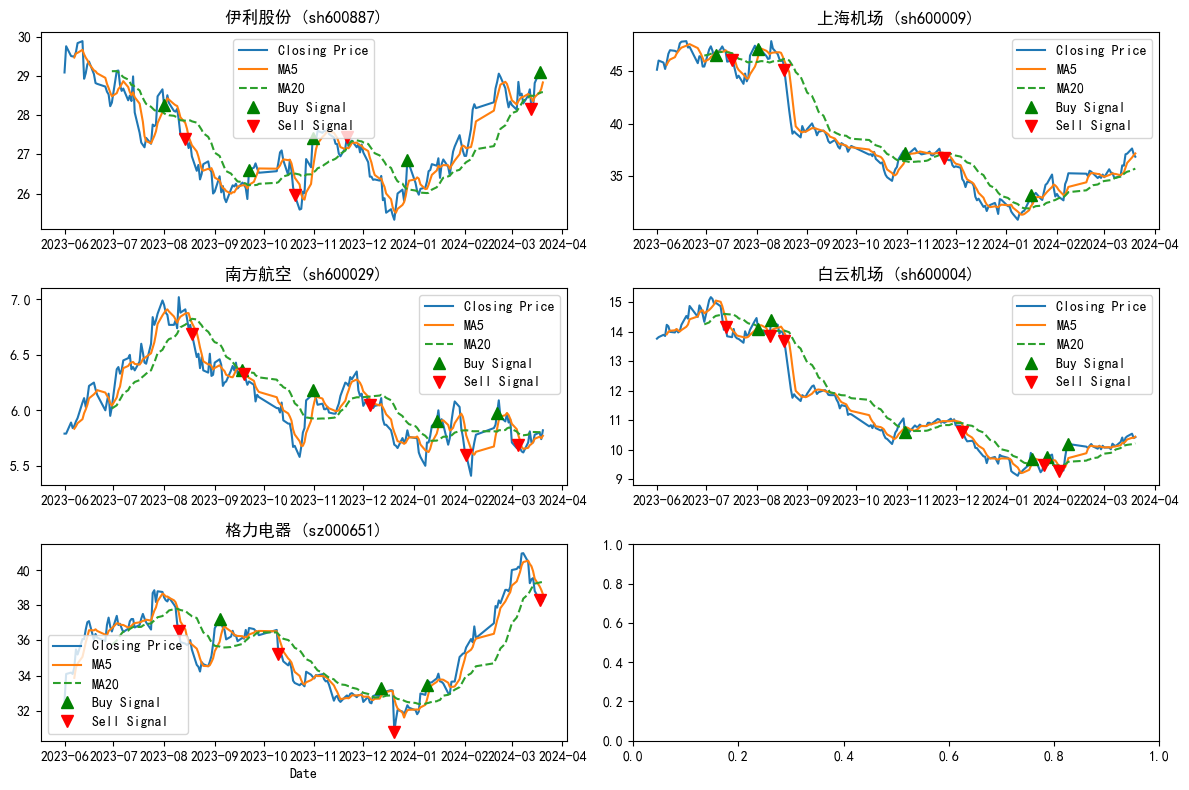

In [13]:
# Create a figure and axes for the subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 8))  # 3 rows, 2 columns

for i, stock_index in enumerate(stock_list):
    stock_data = get_signal(stock_index)
    stock_name = symbol_name_dict.get(stock_index)
    # print(f'{stock_name}: {stock_index}\n')
    
    # Calculate the subplot position
    row = i // 2  # Determine the row index
    col = i % 2   # Determine the column index
    
    # Retrieve the corresponding subplot axes
    ax = axs[row, col]

    # Convert the index into datetime
    stock_data.index = pd.to_datetime(stock_data['date'], format='%Y-%m-%d')
    
    # Plot the closing prices
    ax.plot(stock_data.index, stock_data["close"], label="Closing Price")
    
    # Plot the moving averages (ma5 and ma20)
    ax.plot(stock_data.index, stock_data["ma5"], linestyle='-', label="MA5")
    ax.plot(stock_data.index, stock_data["ma20"], linestyle='--', label="MA20")
    
    # Plot the buy and sell signals
    ax.plot(stock_data[stock_data['buy_signal']]['date'], stock_data[stock_data['buy_signal']]['close'], 'g^', markersize=8, label='Buy Signal')
    ax.plot(stock_data[stock_data['sell_signal']]['date'], stock_data[stock_data['sell_signal']]['close'], 'rv', markersize=8, label='Sell Signal')

    # Set the subplot title and legend
    ax.set_title(f"{stock_name} ({stock_index})")
    ax.legend()
    
    # Set the x-axis label only for the bottom subplots
    if row == 2:
        ax.set_xlabel("Date")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [14]:
stock_data = ak.stock_zh_a_daily(symbol=stock_list[1], start_date=start_date, end_date=end_date)
stock_data

,date,open,high,low,close,volume,amount,outstanding_share,turnover
0,2023-06-01,46.45,46.45,45.05,45.12,15642062.0,712139392.0,1.926958e+09,0.008117
1,2023-06-02,45.12,46.18,45.12,45.99,10267928.0,469936114.0,1.926958e+09,0.005329
2,2023-06-05,45.99,46.35,45.44,45.80,6374909.0,292877224.0,1.926958e+09,0.003308
3,2023-06-06,45.84,46.05,44.82,45.19,10474472.0,475916060.0,1.926958e+09,0.005436
4,2023-06-07,45.19,46.50,45.13,45.84,9062402.0,415794171.0,1.926958e+09,0.004703
...,...,...,...,...,...,...,...,...,...
190,2024-03-14,36.17,37.47,36.10,37.10,25709959.0,952217995.0,1.926958e+09,0.013342
191,2024-03-15,37.19,37.50,36.90,37.16,14401626.0,535312061.0,1.926958e+09,0.007474
192,2024-03-18,37.07,37.85,36.80,37.65,13322677.0,500518671.0,1.926958e+09,0.006914
193,2024-03-19,37.65,37.65,37.10,37.12,10050860.0,374655661.0,1.926958e+09,0.005216


##### Visualisation

In [14]:
# 获取A股指数数据
a_share_data = ak.stock_zh_index_daily(index="sz000001", start_date=start_date, end_date=end_date)

# 获取美股指数数据
us_stock_data = ak.stock_us_daily(symbol="DJI", start_date=start_date, end_date=end_date)

# 绘制A股和美股指数比较图
plt.figure(figsize=(12, 6))
plt.plot(a_share_data["date"], a_share_data["close"], label="A股指数")
plt.plot(us_stock_data["date"], us_stock_data["close"], label="美股指数")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("A股和美股指数比较")
plt.legend()
plt.show()

TypeError: stock_zh_index_daily() got an unexpected keyword argument 'index'

##### # read more on https://zhuanlan.zhihu.com/p/678521592